<a href="https://colab.research.google.com/github/mrzResearchArena/ACP/blob/master/ACP-500-164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
ls

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP-500-164.h5
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
blosum-164.npy
blosum-500.npy
blosum62-acp240.npy
blosum62-acp740.npy
bpf-164.npy
bpf-500.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240.png
model-500-164.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_sequences.npy
physico_coded_ACP740_sequences.npy


In [0]:
cd 'drive/My Drive/Colab-Notebooks'

[Errno 2] No such file or directory: 'drive/My Drive/Colab-Notebooks'
/content/drive/My Drive/Colab-Notebooks


In [0]:
pwd

'/content/drive/My Drive/Colab-Notebooks'

In [0]:
ls -1

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP-500-164.h5
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
blosum-164.npy
blosum-500.npy
blosum62-acp240.npy
blosum62-acp740.npy
bpf-164.npy
bpf-500.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240.png
model-500-164.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_sequences.npy
physico_coded_ACP740_sequences.npy


In [45]:
# Initialize TF-2.x:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print('We\'re using TF-{}.'.format(tf.__version__))

# Colab Auto Click: [https://paste.ubuntu.com/p/R78fGBJbjb/]

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
We're using TF-2.1.0.


In [0]:
# Deep Neural Networks:
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     LSTM, GRU, Embedding, Bidirectional, concatenate)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)

#Utilities:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Ytrain = labelEncoding(Ytrain, dtype=int)
from tensorflow.keras.utils import plot_model                        # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

In [0]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

In [77]:
# D = 20    # terminus_length

X1train = np.load('bpf-500.npy')
X2train = np.load('physico_coded_ACP500_sequences.npy')
X3train = np.load('blosum-500.npy')

# X3train = X3train.reshape(-1, 20, 11)

print(X1train.shape)
print(X2train.shape)
print(X3train.shape)
print('### --- --- --- --- --- ###')

X1train = X1train[:,:,0:20]
X2train = X2train[:,:,0:20]

print(X1train.shape)
print(X2train.shape)
print(X3train.shape)

### -----------------------------------------------------
X1test = np.load('bpf-164.npy')
X2test = np.load('physico_coded_ACP164_sequences.npy')
X3test = np.load('blosum-164.npy')

print(X1test.shape)
print(X2test.shape)
print(X3test.shape)

X1test = X1test[:,:,0:20]
X2test = X2test[:,:,0:20]

print(X1test.shape)
print(X2test.shape)
print(X3test.shape)

print('### --- --- --- --- --- ###')

# ACP {500, 164}
Ytrain  = [0 for _ in range(250)]
Ytrain += [1 for _ in range(250)]
Ytrain  = np.array(Ytrain)

Ytest  = [0 for _ in range(82)]
Ytest += [1 for _ in range(82)]


Ytrain = labelEncoding(Ytrain, dtype=int)
Ytest  = labelEncoding(Ytest, dtype=int)

(500, 20, 25)
(500, 7, 207)
(500, 20, 25)
### --- --- --- --- --- ###
(500, 20, 20)
(500, 7, 20)
(500, 20, 25)
(164, 20, 25)
(164, 7, 207)
(164, 20, 25)
(164, 20, 20)
(164, 7, 20)
(164, 20, 25)
### --- --- --- --- --- ###


In [0]:
# def Network():
#     ### Head-1:
#     input1 = Input(shape=(20, 25)) # T=20

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(input1)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     head1 = Flatten()(x)


#     # ### Head-2:
#     input2 = Input(shape=(7, 20)) # T=7

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(input2)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     head2 = Flatten()(x)


#     # ### Head-3:
#     input3 = Input(shape=(20, 25))

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu', kernel_regularizer=l2(l=0.01))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.50)(x)

#     head3 = Flatten()(x)

#     # merge
#     merge = concatenate(inputs=[head1, head2, head3])
    
#     #o = Dense(units=12, activation='relu',)(merge)
#     #o = BatchNormalization()(o)
#     #o = Dropout(rate=0.60)(o)
    
#     o = Dense(units=6, activation='relu',)(merge)
#     o = BatchNormalization()(o)
#     o = Dropout(rate=0.50)(o)

#     output = Dense(units=2, activation='softmax')(o)

#     return Model(inputs=[input1, input2, input3], outputs=[output])
# #end-def


def Network():
    ### Head-1:
    input1 = Input(shape=(20, 20))

    x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input1)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    head1 = Flatten()(x)


    ### Head-2:
    input2 = Input(shape=(7, 20)) # T=7

    x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input2)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.50)(x)

    x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.50)(x)

    head2 = Flatten()(x)


    ### Head-3:
    input3 = Input(shape=(20, 25))

    x = Conv1D(filters=10, kernel_size=3, padding='valid', data_format='channels_first', activation='relu',)(input3)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.80)(x)


    x = Conv1D(filters=6, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    head3 = Flatten()(x)

    ### Merge:
    merge = concatenate(inputs=[head1, head2, head3])
    output = Dense(units=2, activation='softmax',)(merge)

    return Model(inputs=[input1, input2, input3], outputs=[output])
#end-def

Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_98 (InputLayer)           [(None, 20, 20)]     0                                            
__________________________________________________________________________________________________
input_99 (InputLayer)           [(None, 7, 20)]      0                                            
__________________________________________________________________________________________________
input_100 (InputLayer)          [(None, 20, 25)]     0                                            
__________________________________________________________________________________________________
conv1d_239 (Conv1D)             (None, 8, 20)        488         input_98[0][0]                   
___________________________________________________________________________________________

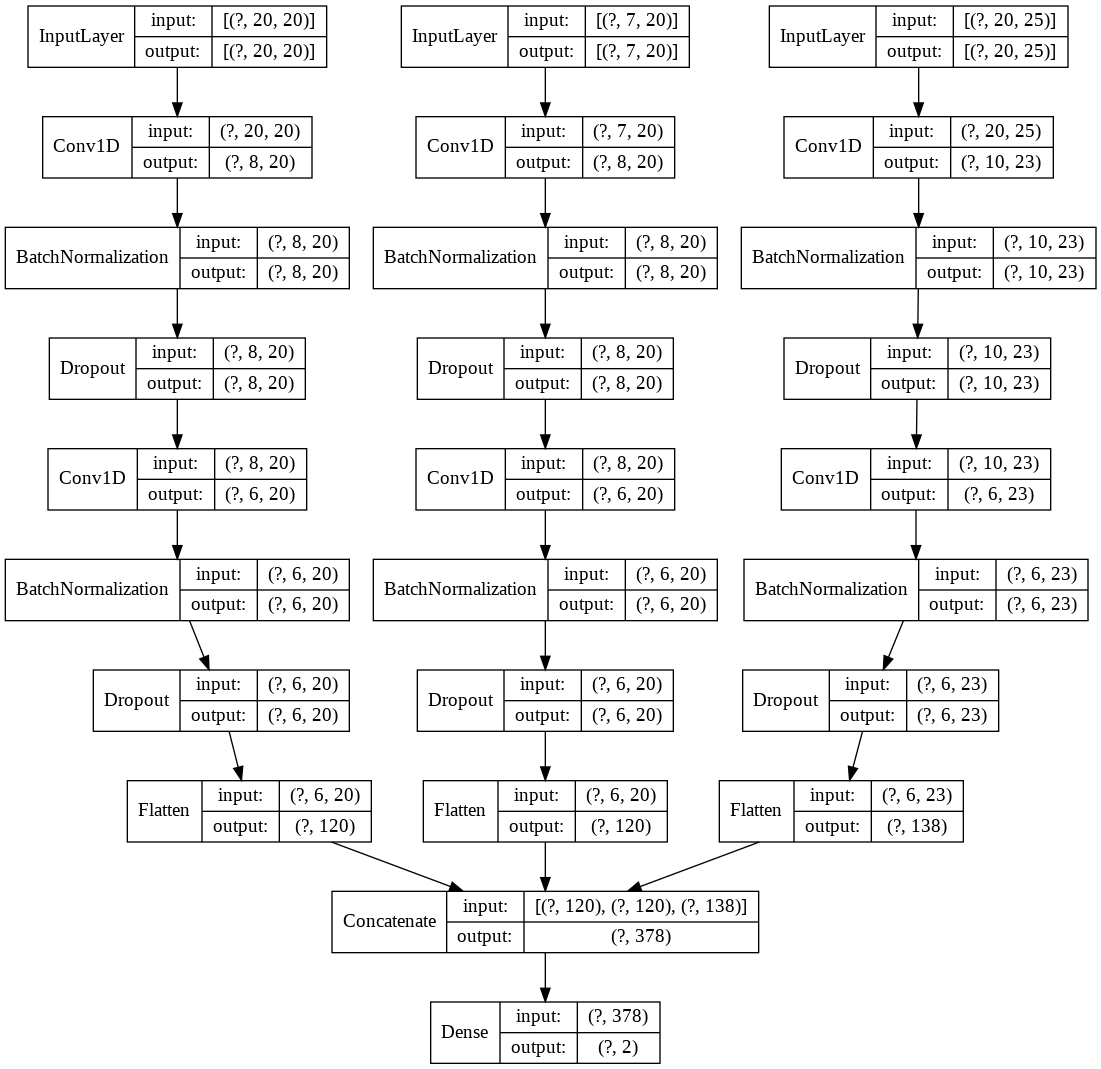

In [105]:
model = Network()
model.summary()
plot_model(model, to_file='model-500-164.png', show_shapes=True, show_layer_names=False, expand_nested=True)

Train on 500 samples, validate on 164 samples
Epoch 1/200
500/500 [==============================] - 3s 5ms/sample - loss: 1.2494 - accuracy: 0.5560 - val_loss: 0.7309 - val_accuracy: 0.5915
Epoch 2/200
500/500 [==============================] - 0s 594us/sample - loss: 1.0262 - accuracy: 0.6080 - val_loss: 0.7987 - val_accuracy: 0.6037
Epoch 3/200
500/500 [==============================] - 0s 577us/sample - loss: 0.9050 - accuracy: 0.6380 - val_loss: 0.6286 - val_accuracy: 0.6890
Epoch 4/200
500/500 [==============================] - 0s 647us/sample - loss: 0.7839 - accuracy: 0.6360 - val_loss: 0.6384 - val_accuracy: 0.7073
Epoch 5/200
500/500 [==============================] - 0s 681us/sample - loss: 0.8724 - accuracy: 0.6300 - val_loss: 0.6017 - val_accuracy: 0.7256
Epoch 6/200
500/500 [==============================] - 0s 570us/sample - loss: 0.7149 - accuracy: 0.6480 - val_loss: 0.6057 - val_accuracy: 0.6768
Epoch 7/200
500/500 [==============================] - 0s 570us/sample - l

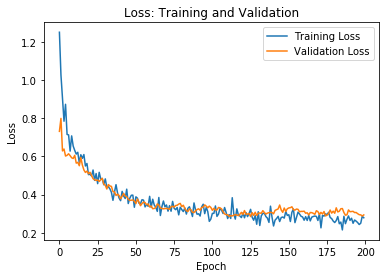

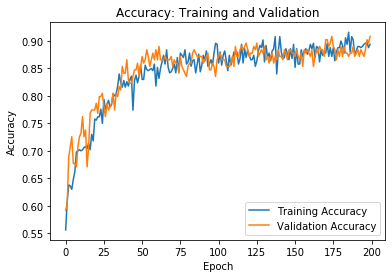

In [106]:
# Setting epoch and batch number
setEpochNumber     = 200       ### 2,500 performed well!
setBatchSizeNumber = 16

# Compile Model:
model = Network()
model.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Run Model:
# results = model.fit(x=[X1train, X2train, X3train],
#                     y=[Ytrain], 
#                     validation_data=([X1test, X2test, X3test], [Ytest]),
#                     epochs=setEpochNumber,
#                     batch_size=setBatchSizeNumber,
#                     verbose=1)


# # Performance Metices:
# Yactual = Ytest.argmax(axis=1)
# Yp = model.predict([X1test, X2test, X3test])
# Yp = Yp.argmax(axis=1)

# CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
# TN, FP, FN, TP = CM.ravel()

# print()
# print('Accuracy: {:.2f}'.format(accuracy))
# print('MCC: {:.2f}'.format(matthews_corrcoef(y_true=Yactual, y_pred=Yp)))
# print('Sensitivity: {0:.4f}'.format(TP / (TP + FN)))
# print('Specificity: {0:.4f}'.format(TN / (TN + FP)))
# print('Precision: {0:.4f}'.format(precision_score(y_true=Yactual, y_pred=Yp)))
# print()

# # Performance Plot
# lossPlot(results)
# accuracyPlot(results)


results = model.fit(x=[X1train, X2train, X3train],
                    y=[Ytrain], 
                    validation_data=([X1test, X2test, X3test], [Ytest]),
                    epochs=setEpochNumber,
                    batch_size=setBatchSizeNumber,
                    verbose=1)


# Evaluate the Model:
_, accuracy = model.evaluate(x=[X1test, X2test, X3test], y=Ytest, batch_size=setBatchSizeNumber)


# Performance Metices:
Yactual = Ytest.argmax(axis=1)
Yp = model.predict([X1test, X2test, X3test])
Yp = Yp.argmax(axis=1)

CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
TN, FP, FN, TP = CM.ravel()

print()
print('Accuracy: {:.2f}'.format(accuracy))
print('MCC: {:.2f}'.format(matthews_corrcoef(y_true=Yactual, y_pred=Yp)))
print('Sensitivity: {0:.4f}'.format(TP / (TP + FN)))
print('Specificity: {0:.4f}'.format(TN / (TN + FP)))
print('Precision: {0:.4f}'.format(precision_score(y_true=Yactual, y_pred=Yp)))
print()

# Performance Plot
lossPlot(results)
accuracyPlot(results)

Help on class Dropout in module tensorflow.python.keras.layers.core:

class Dropout(tensorflow.python.keras.engine.base_layer.Layer)
 |  Applies Dropout to the input.
 |  
 |  Dropout consists in randomly setting
 |  a fraction `rate` of input units to 0 at each update during training time,
 |  which helps prevent overfitting.
 |  
 |  Arguments:
 |    rate: Float between 0 and 1. Fraction of the input units to drop.
 |    noise_shape: 1D integer tensor representing the shape of the
 |      binary dropout mask that will be multiplied with the input.
 |      For instance, if your inputs have shape
 |      `(batch_size, timesteps, features)` and
 |      you want the dropout mask to be the same for all timesteps,
 |      you can use `noise_shape=(batch_size, 1, features)`.
 |    seed: A Python integer to use as random seed.
 |  
 |  Call arguments:
 |    inputs: Input tensor (of any rank).
 |    training: Python boolean indicating whether the layer should behave in
 |      training mode (